In [2]:
import numpy as np
from skimage import io
import util as ut
import math
import matplotlib.pyplot as plt
from skimage import util as skutil

## Sequentielle Regionenmarkierung für Binärbilder

In [3]:
def sequential_labelling(img):
    m = 2
    c = list()

    # part 1
    for line_idx in range(0, len(img)):
        for pxl_idx in range(0, len(img[0])):
            if img[line_idx][pxl_idx] == 1:
                for i in range(-1, 2):
                    for j in range(-1, 2):
                        if (line_idx + i) < 0 or (pxl_idx + j) < 0:
                            continue
                        if line_idx + i > len(img) - 1 or pxl_idx + j > len(img[0]) - 1:
                            continue
                        n = img[line_idx + i][pxl_idx + j]
                        if n > 1 and n != img[line_idx][pxl_idx]:
                            if img[line_idx][pxl_idx] == 1:
                                img[line_idx][pxl_idx] = n
                            else:
                                s = set()
                                s.add(img[line_idx][pxl_idx])
                                s.add(n)
                                c.append(s)
                if img[line_idx][pxl_idx] == 1:
                    img[line_idx][pxl_idx] = m
                    m += 1

    ut.printImage(img)

    # part 2
    for i in range(len(c)):
        for j in range(len(c)):
            if c[i].__eq__(c[j]):
                continue
            s_tmp = c[j]
            for value in s_tmp:
                if value in c[i]:
                    c[i] = c[i].union(c[j])
                    c[j] = set()
                    break

    # part 3
    for line_idx in range(len(img)):
        for pxl_idx in range(len(img[0])):
            if img[line_idx][pxl_idx] > 1:
                for s in c:
                    if img[line_idx][pxl_idx] in s:
                        img[line_idx][pxl_idx] = min(s)
    return img

In [4]:
def to_bin(img):
    result = img.copy()
    max_val = np.max(img)
    for i in range(0, len(img)):
        for j in range(0, len(img[0])):
            if img[i][j] >= max_val / 2:
                result[i][j] = 1
            else:
                result[i][j] = 0
    return result

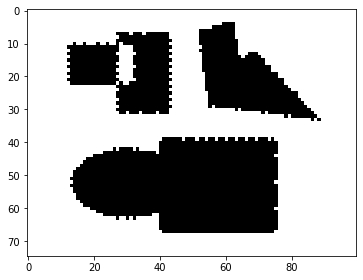

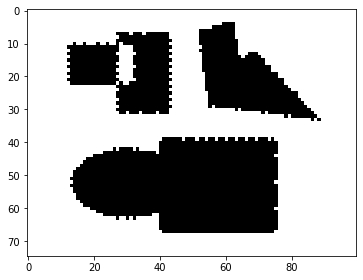

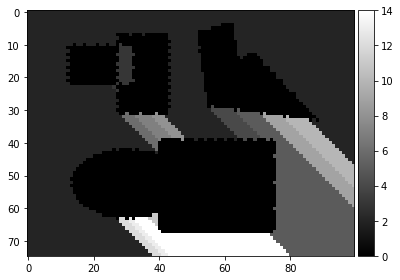

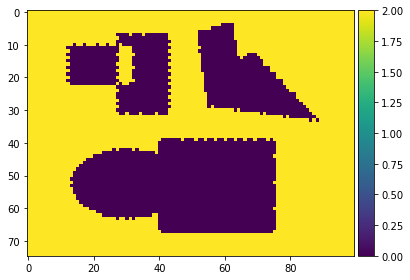

In [7]:
#test
img_1 = io.imread("A7/regionen1.png", plugin="matplotlib", as_gray=True)
ut.printImage(img_1,False)
img_1 = to_bin(img_1)
ut.printImage(img_1,False)

sequential_labelling(img_1)
ut.printImage(img_1,False)